In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_theme()

In [25]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files(
    'shubhambathwal/flight-price-prediction',
    path = 'data/',
    unzip=True
)

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


In [26]:
df = pd.read_csv('data/Clean_Dataset.csv')

In [27]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
df.shape

(300153, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [31]:
df.drop(df.columns[0] , axis =1 , inplace=True)

In [35]:
#Univariate Analysis
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

In [37]:
numeric_features = [col for col in df.columns if col not in categorical_features]

In [38]:
numeric_features

['duration', 'days_left', 'price']

## Univariate Analysis

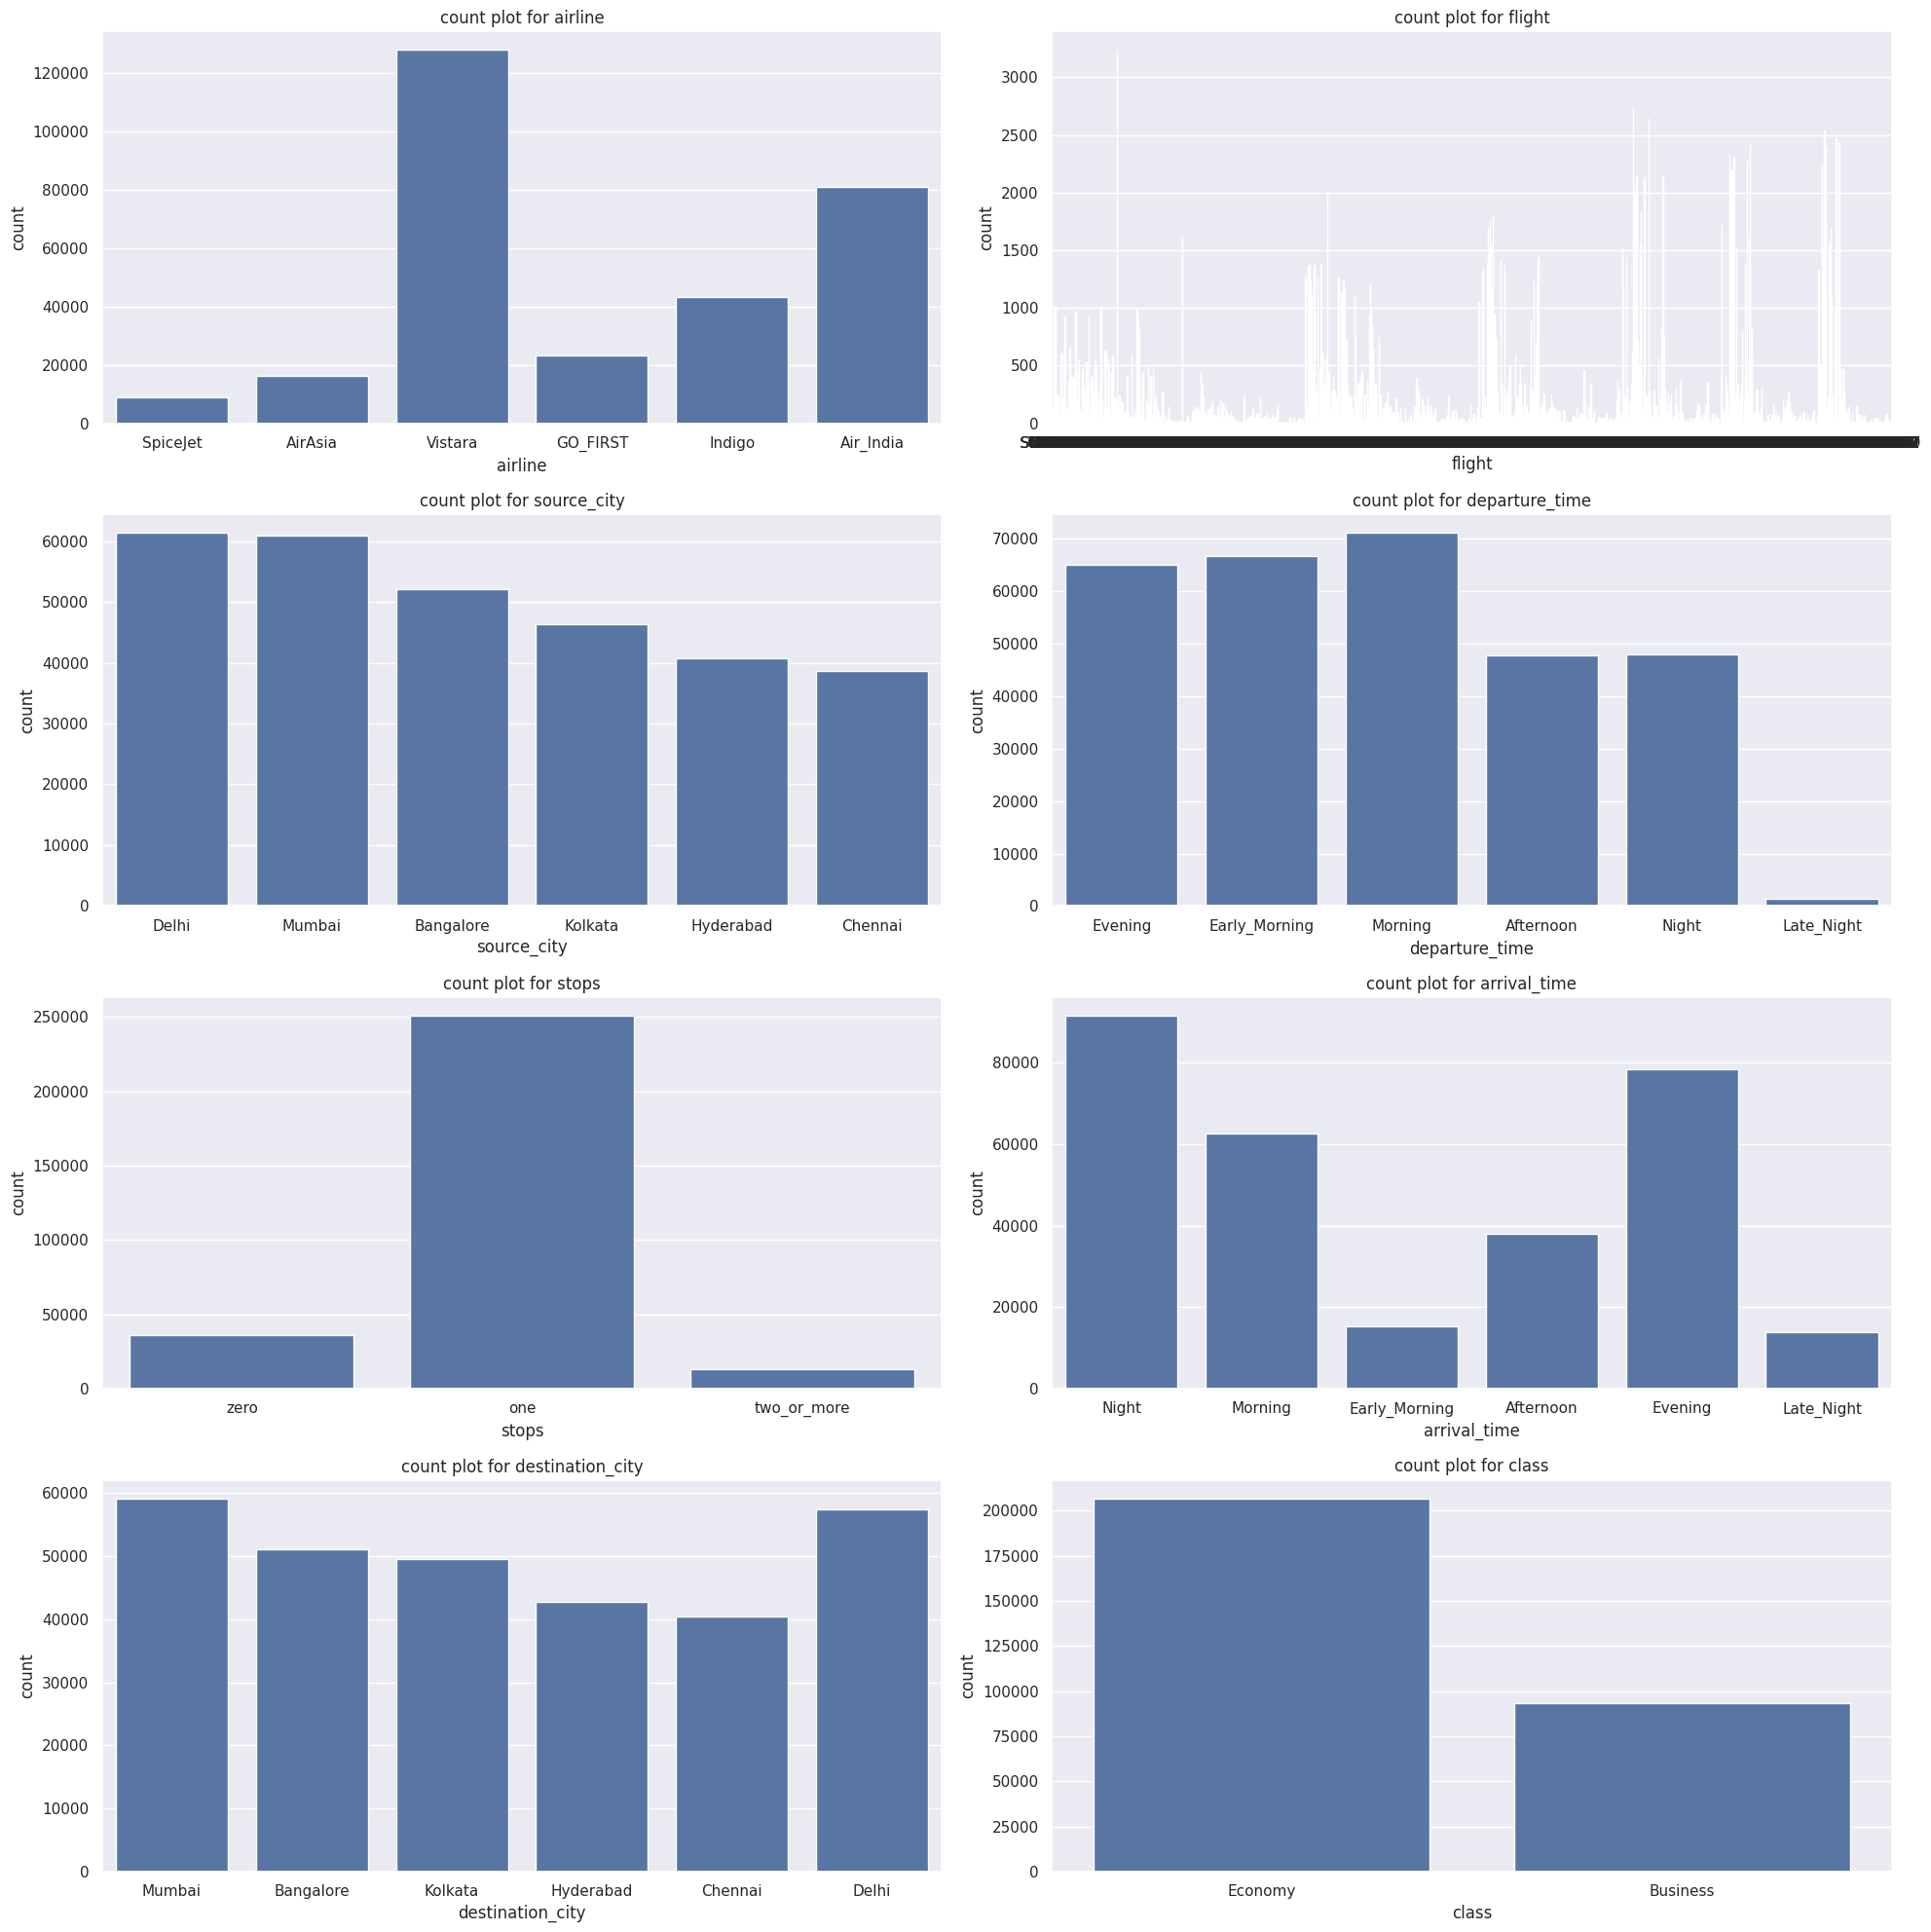

In [44]:
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols
fig , axes = plt.subplots(n_rows , n_cols , figsize = (20 , 5 * n_rows))
axes = axes.flatten()

for i , col in enumerate(categorical_features):
    sns.countplot(data = df , x = col , ax=axes[i])
    axes[i].set_title(f'count plot for {col}')

plt.tight_layout()
plt.show()

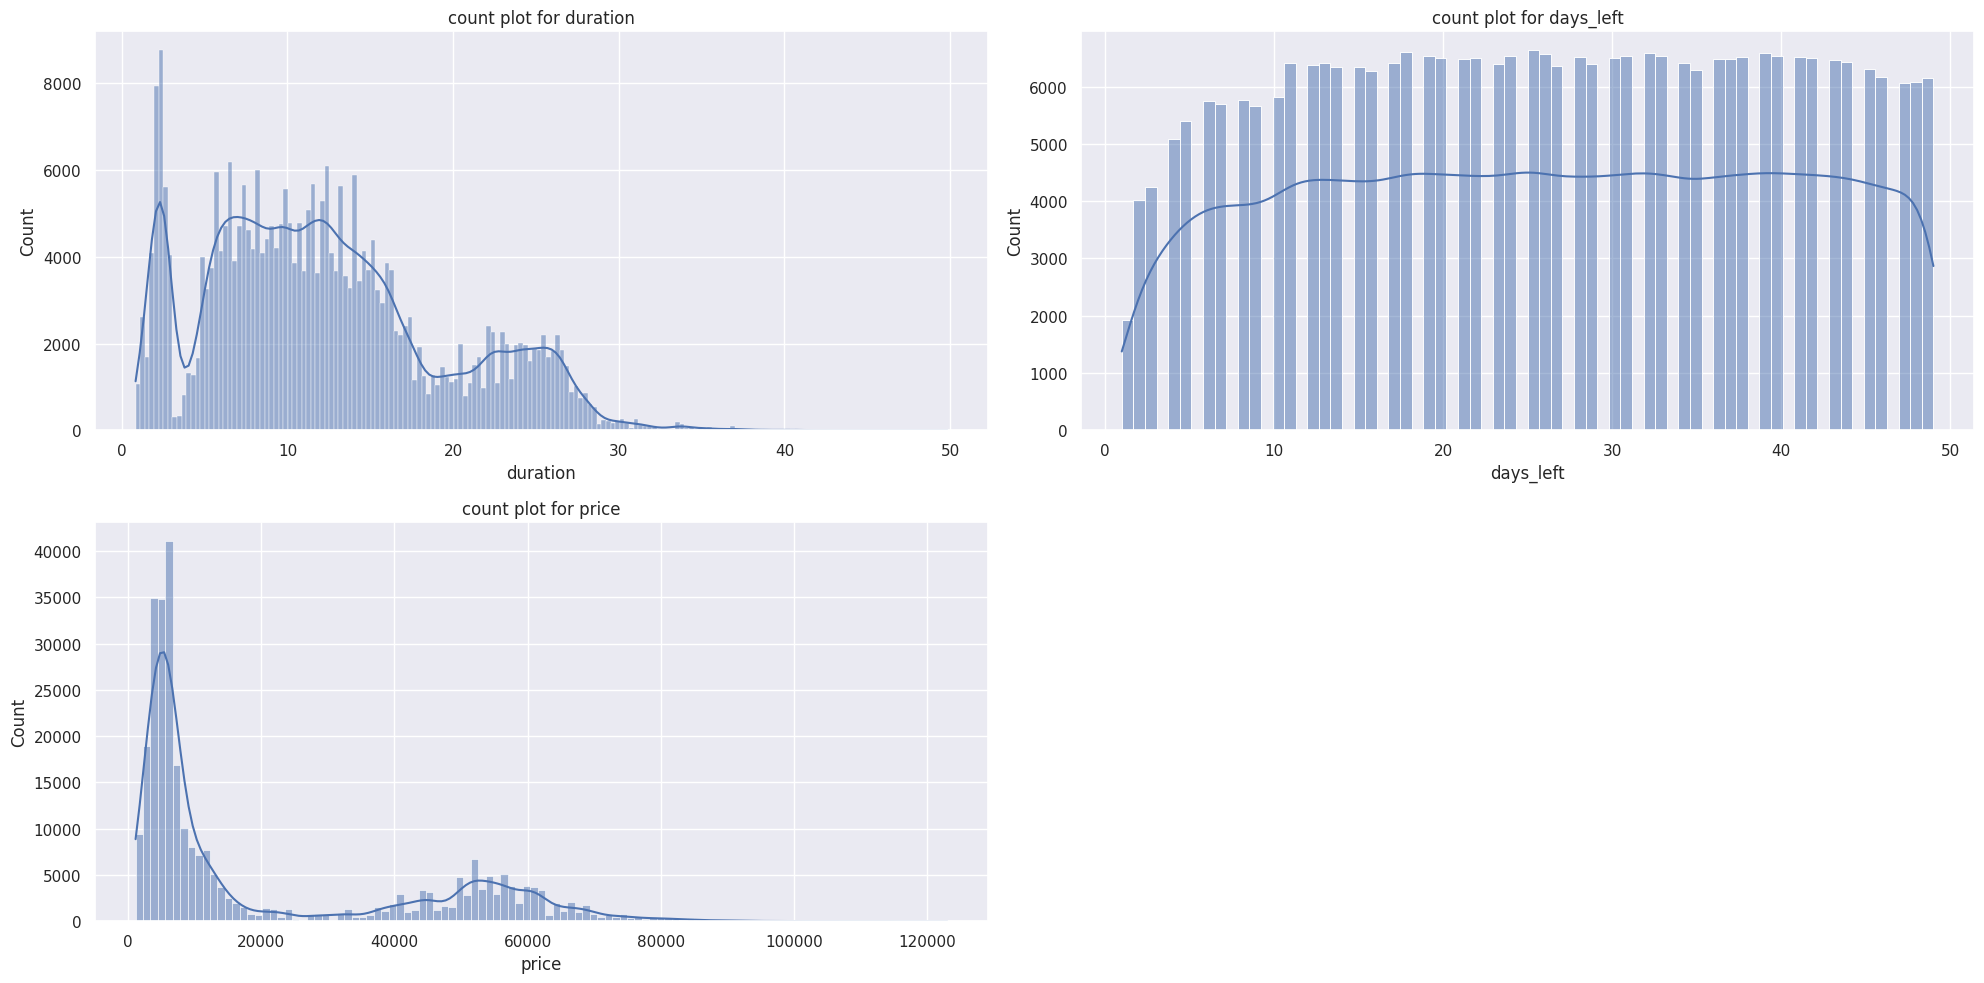

In [47]:
n_cols = 2
n_rows = (len(numeric_features) + 1) // n_cols
fig , axes = plt.subplots(n_rows , n_cols , figsize = (20 , 5 * n_rows))
axes = axes.flatten()

for i , col in enumerate(numeric_features):
    sns.histplot(data = df , x = col , ax=axes[i] , kde = True)
    axes[i].set_title(f'count plot for {col}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

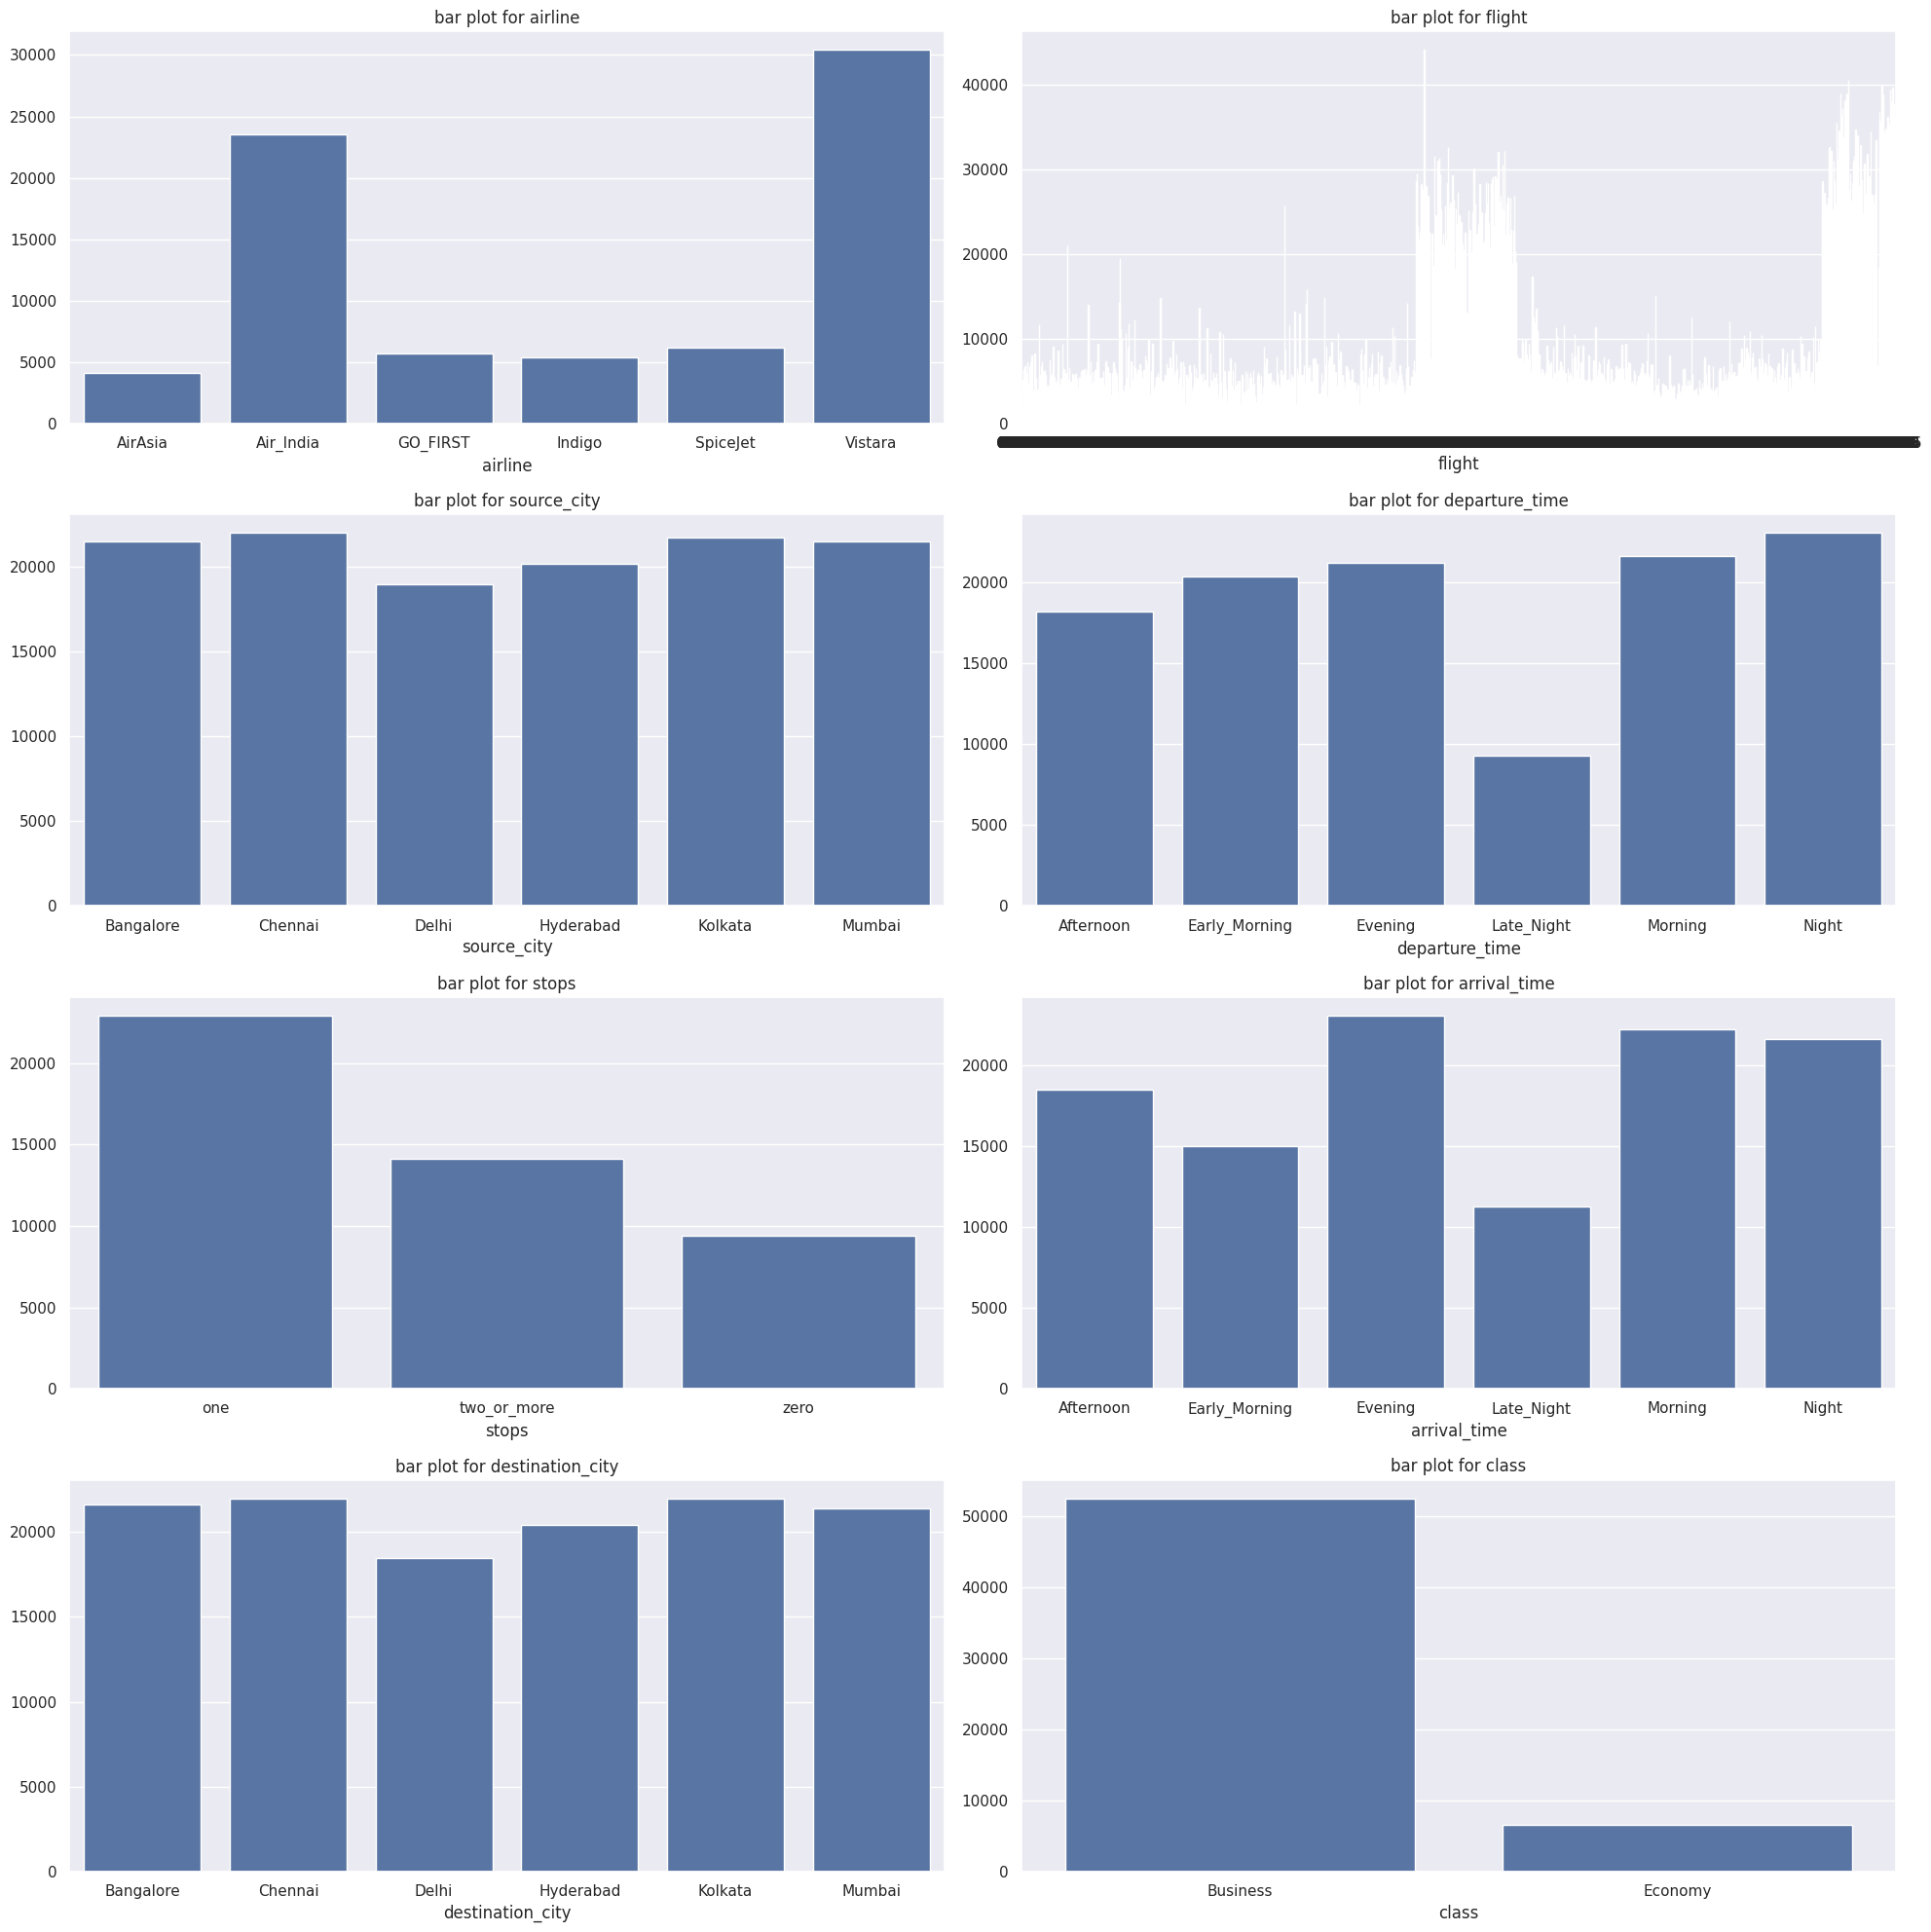

In [58]:
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols
fig , axes = plt.subplots(n_rows , n_cols , figsize = (20 , 5 * n_rows))
axes = axes.flatten()

for i , col in enumerate(categorical_features):
    subset_data = df.groupby(col)['price'].mean()
    sns.barplot(x = subset_data.index , y = subset_data.values , ax=axes[i])
    axes[i].set_title(f'bar plot for {col}')

    
plt.tight_layout()
plt.show()

In [73]:
df['flight'].nunique()

1561

In [84]:
pd.DataFrame(df['flight'].value_counts(normalize=True)*100)

,proportion
flight,
UK-706,1.077784
UK-772,0.913201
UK-720,0.882883
UK-836,0.846901
UK-822,0.822247
...,...
6E-2914,0.000333
G8-107,0.000333
SG-9974,0.000333
